# Introduction
I found this dataset on kaggle and thought I will see how I can perform on it. See link below:

https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

## The about section:
The dataset allows one to predict whether a patient is likely to have a heart attack or not based on the following features.

https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/discussion/234843

- Age : Age in years of the patient

- Sex : Gender of the patient (1 = male; 0 = female)

- cp : Chest Pain type chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic


- trtbps : resting blood pressure (in mm Hg)

- chol : cholestoral in mg/dl fetched via BMI sensor

- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- rest_ecg : resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria


- thalach : maximum heart rate achieved

- exang: exercise induced angina (1 = yes; 0 = no)

- oldpeak: ST depression induced by exercise relative to rest

- slope: the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)

- caa: number of major vessels (0-3) colored by flourosopy

- output : 0= less chance of heart attack 1= more chance of heart attack

# Getting started

In [1]:
import os

directory_path = os.path.join(os.getcwd(), 'Data')

for filenames in os.listdir(directory_path):
    print(filenames)

.ipynb_checkpoints
heart.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_main = pd.read_csv(os.path.join(directory_path,'heart.csv'))

In [4]:
df = df_main.copy()

In [5]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Exploratory data analysis

In [9]:
df.shape

(303, 14)

In [10]:
#Checking for missing values

missing_data = df.isnull()

missing_data.sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [11]:
#Let's see what kind of data we have

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
#Let's check out how the data is distributed

df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


It is obvious that there are categorical as well as continuous data columns.

In [17]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
cont_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

Let's plot the continuous and categorical variables.

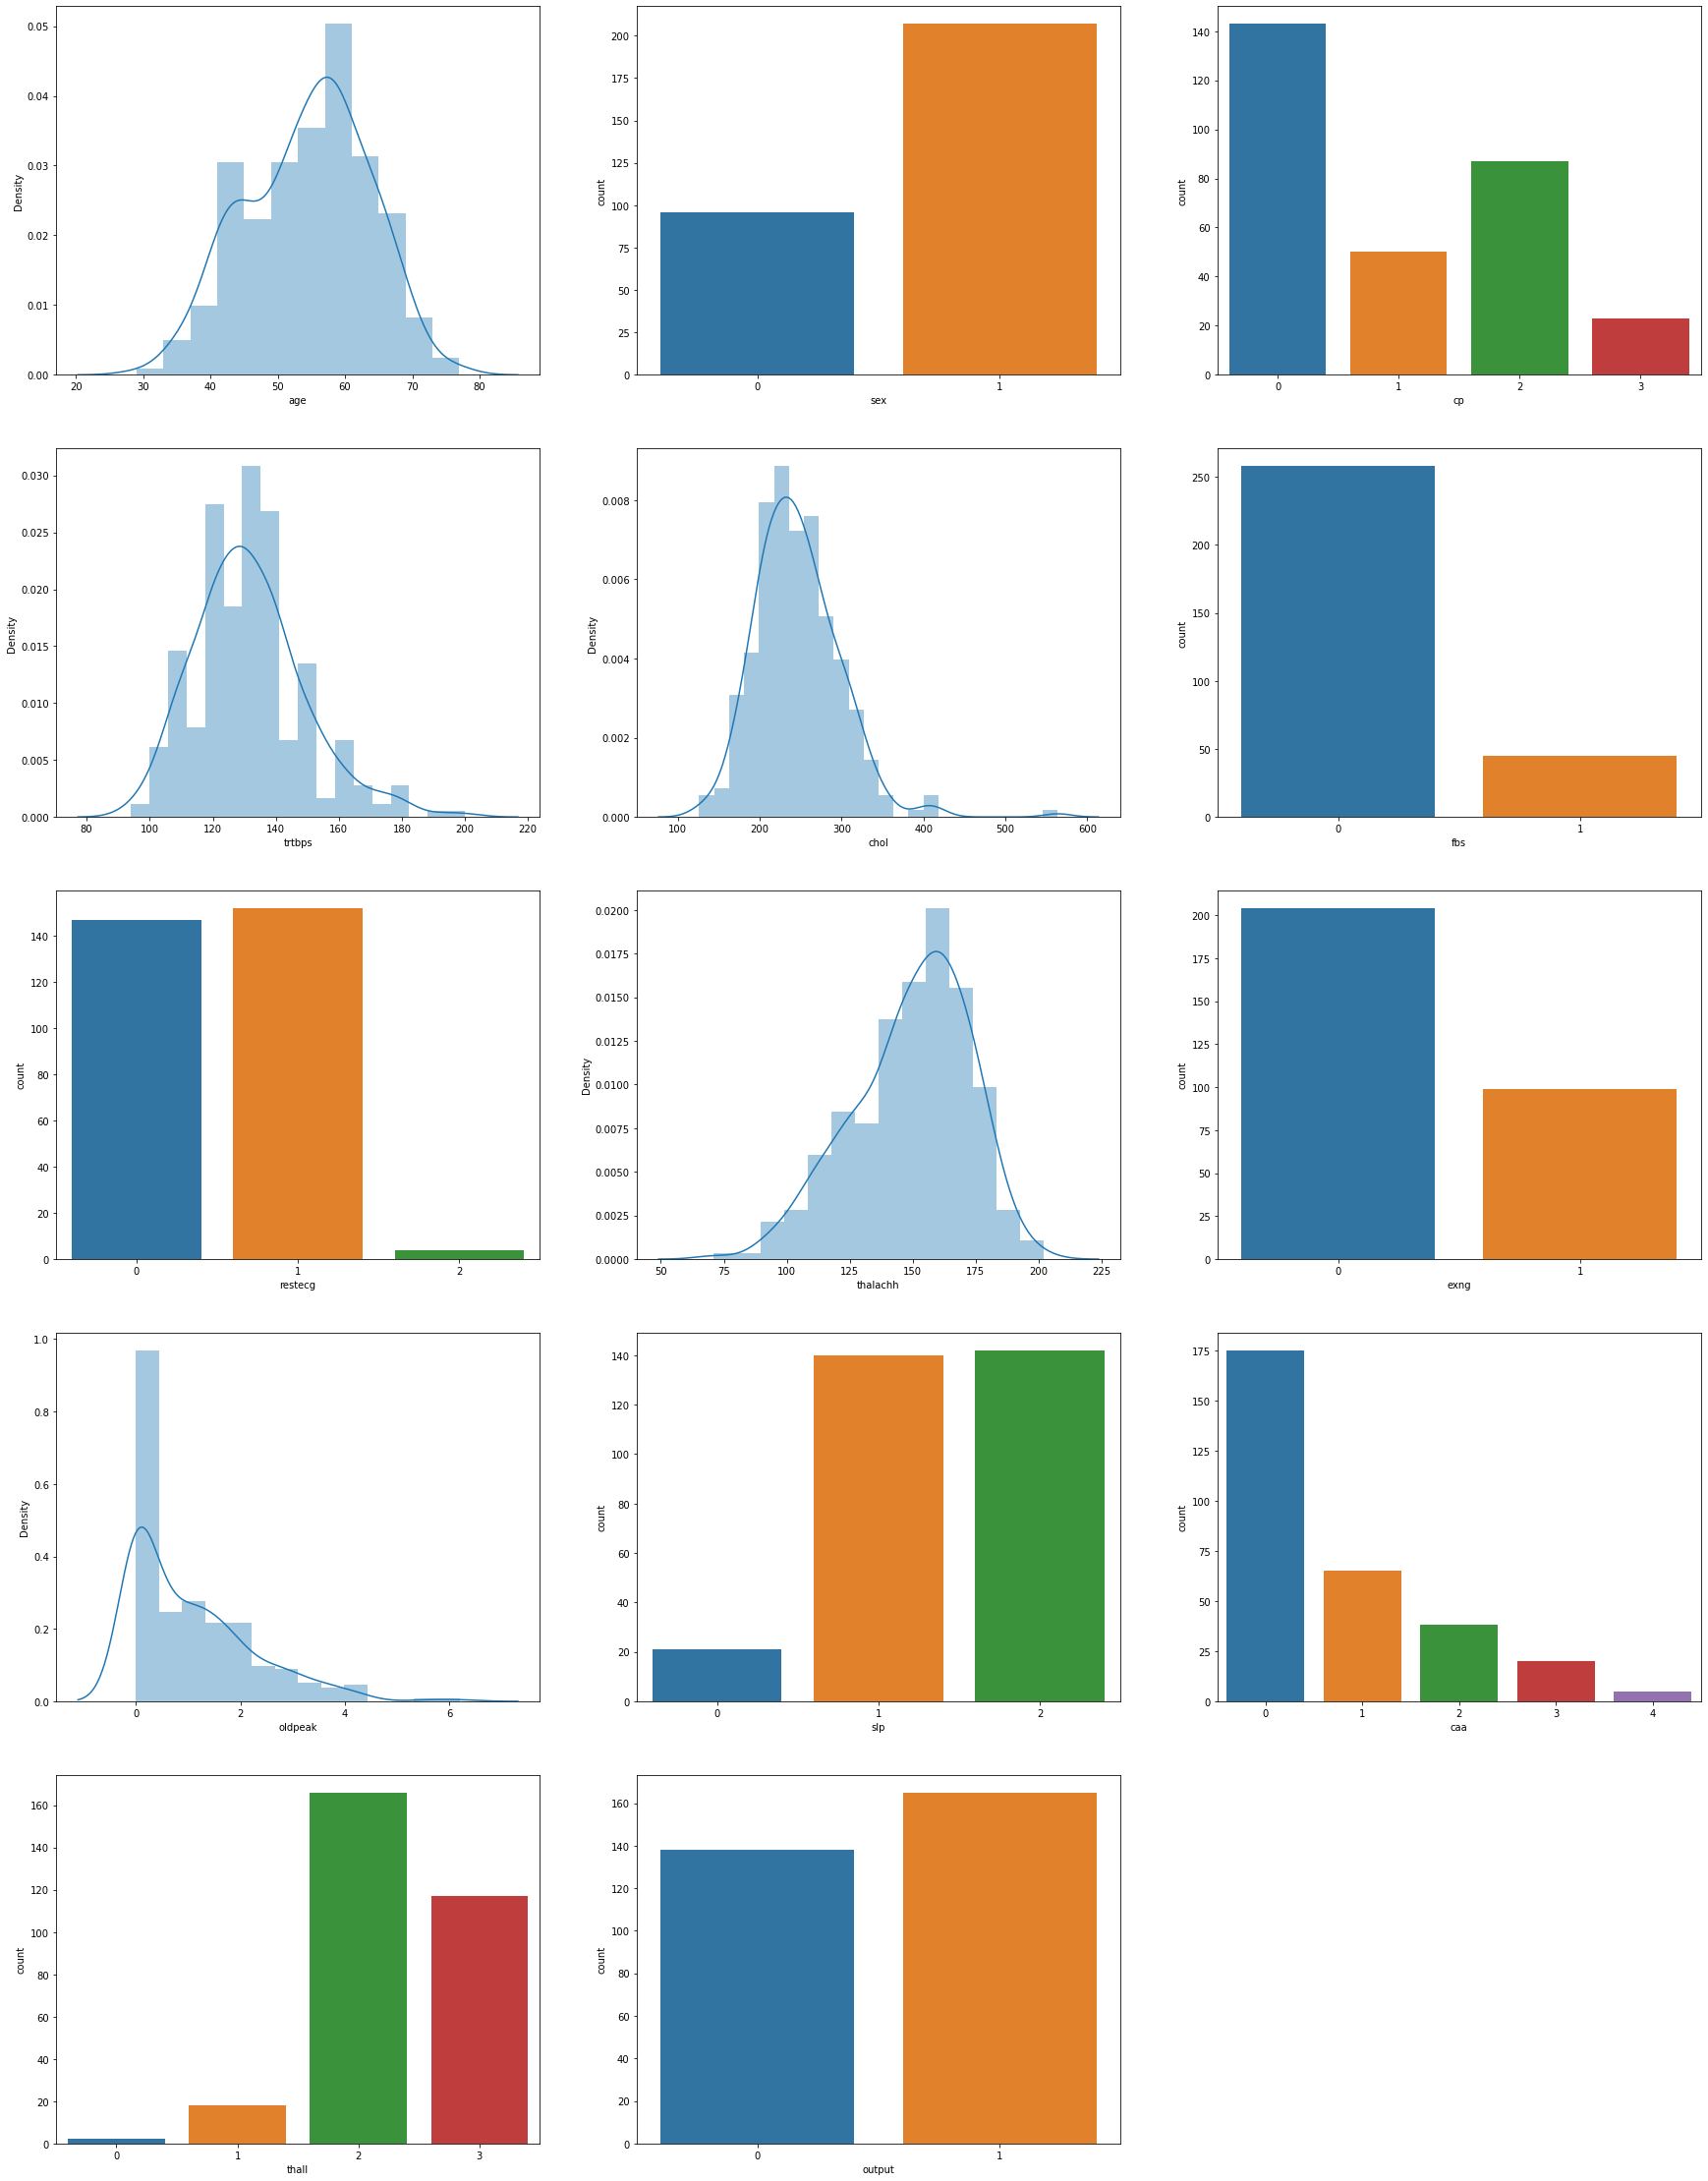

In [16]:
fig, ax = plt.subplots(ncols = 3, nrows = 5, figsize = (30, 40))
index = 0
ax = ax.flatten()

for col in list(df.columns):
    if col in cat_cols:
        sns.countplot(data=df, x=col, ax=ax[index])
        index += 1
    else:
        sns.distplot(df[col], ax=ax[index])
        index += 1
fig.delaxes(ax[14])
plt.draw()

Let's see how the features and labels are correlated with each other.

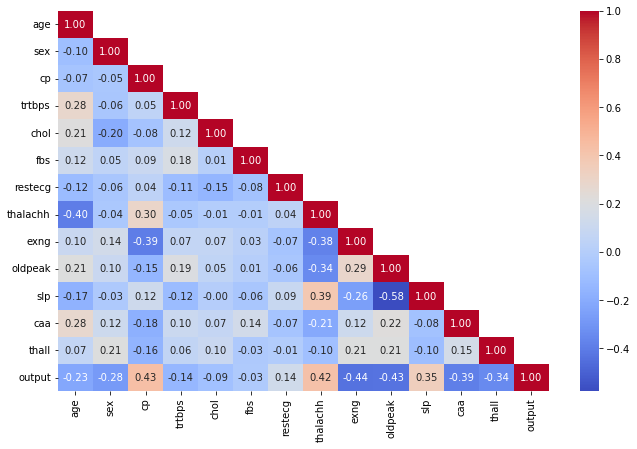

In [18]:
# correlation heatmap
hmap_mask = np.triu(df.corr(), k=1)
plt.figure(figsize=(11,7))
sns.heatmap(df.corr(), mask=hmap_mask, annot = True, fmt='.2f', cmap='coolwarm')
plt.show()

As we can see, none of the variables are highly correlated. Hence, we shall not drop any of them. Let's start modelling.

# Modelling

In [50]:
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

Let's split the data into features & labels, and normalise them.

In [20]:
X = df.drop('output', axis = 1)
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [21]:
y = df.iloc[:,-1:]
y.head()

,output
0,1
1,1
2,1
3,1
4,1


In [22]:
st_scaler = StandardScaler()
X_norm=X.copy()
X_norm[cont_cols]=pd.DataFrame(st_scaler.fit_transform(X_norm[cont_cols]), columns=[cont_cols])
X_norm.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.2, random_state = 65)

## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model_lgr = LogisticRegression()
model_lgr.fit(X_train, y_train)
y_lgr = model_lgr.predict(X_test)
acc_lgr = round(accuracy_score(y_test, y_lgr),4)*100

print("Accuracy with logistic regression is: " + str(acc_lgr) + " %")

Accuracy with logistic regression is: 91.8 %


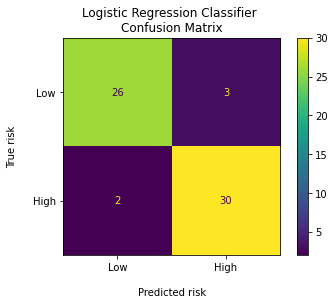

In [52]:
cm_lgr = confusion_matrix(y_test, y_lgr)
disp_lgr = ConfusionMatrixDisplay(confusion_matrix=cm_lgr, display_labels=['Low', 'High'])

disp_lgr.plot()
plt.title('Logistic Regression Classifier \nConfusion Matrix')
plt.xlabel('\nPredicted risk')#, fontsize=12)
plt.ylabel('True risk\n')#, fontsize=12)
plt.show()

## XGBoost Classifier

In [26]:
from xgboost import XGBClassifier

In [27]:
#Creating model object
#https://xgboost.readthedocs.io/en/latest/parameter.html
model_xgb = XGBClassifier(learning_rate=0.1, max_depth=2, n_estimators=25)

#Training the model
model_xgb.fit(X_train, y_train)

#Prediction
y_xgb = model_xgb.predict(X_test)

#Accuracy
acc_xgb = round(accuracy_score(y_test, y_xgb),4)*100

print("\nAccuracy with XGBoost is: " + str(acc_xgb) + " %")

[11:36:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Accuracy with XGBoost is: 95.08 %


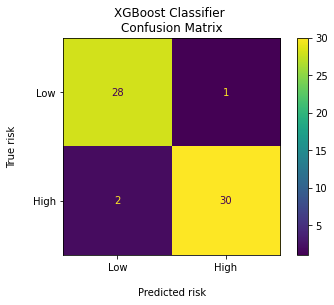

In [53]:
cm_xgb = confusion_matrix(y_test, y_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['Low', 'High'])

disp_xgb.plot()
plt.title('XGBoost Classifier \nConfusion Matrix')
plt.xlabel('\nPredicted risk')
plt.ylabel('True risk\n')
plt.show()

## Support Vector Classifier

In [48]:
from sklearn.svm import SVC

model_svm=SVC(kernel='rbf', C=0.75, gamma= 0.5)
model_svm.fit(X_train,y_train)
y_svm=model_svm.predict(X_test)
acc_svm = round(accuracy_score(y_test, y_svm),4)*100

print("Accuracy with SVM is: " + str(acc_svm) + " %")

Accuracy with SVM is: 93.44 %


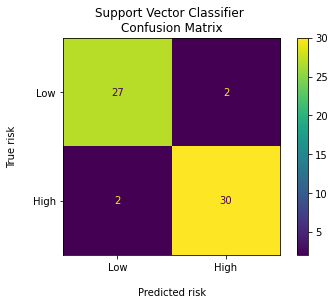

In [54]:
cm_svc = confusion_matrix(y_test, y_svm)
disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=['Low', 'High'])

disp_svc.plot()
plt.title('Support Vector Classifier \nConfusion Matrix')
plt.xlabel('\nPredicted risk')
plt.ylabel('True risk\n')
plt.show()

## Deep Neural Network

In [96]:
import tensorflow as tf

tf.random.set_seed(25)
model = tf.keras.Sequential(
        [
            tf.keras.layers.Dense(256, activation="relu", input_shape=[X.shape[1]]),
            tf.keras.layers.Dense(128, activation="relu"),
            tf.keras.layers.Dense(128, activation="relu"),
            tf.keras.layers.Dense(1, activation="sigmoid"),
        ]
        )
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               3584      
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 129       
Total params: 53,121
Trainable params: 53,121
Non-trainable params: 0
_________________________________________________________________


In [97]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0, shuffle=False)

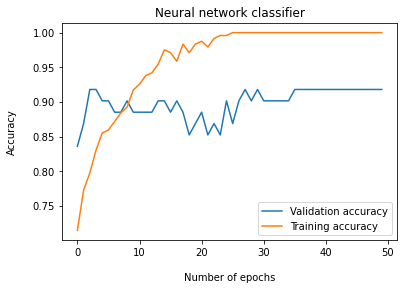


Accuracy with DNN is: 91.8 %


In [98]:
plt.plot(history.history['val_binary_accuracy'], label='Validation accuracy')
plt.plot(history.history['binary_accuracy'], label='Training accuracy')
plt.title('Neural network classifier')
plt.xlabel('\nNumber of epochs')
plt.ylabel('Accuracy\n')
plt.legend()
plt.show()
acc_dnn = round(history.history['val_binary_accuracy'][-1], 4)*100
print("\nAccuracy with DNN is: " + str(acc_dnn) + " %")

In [116]:
y_dnn = np.where(model.predict(X_test)<0.5, 0, 1)

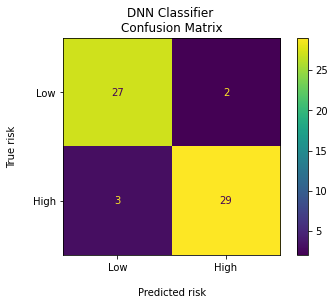

In [117]:
cm_dnn = confusion_matrix(y_test, y_dnn)
disp_dnn = ConfusionMatrixDisplay(confusion_matrix=cm_dnn, display_labels=['Low', 'High'])

disp_dnn.plot()
plt.title('DNN Classifier \nConfusion Matrix')
plt.xlabel('\nPredicted risk')
plt.ylabel('True risk\n')
plt.show()

# Summary

In [119]:
Acc_df = pd.DataFrame(index=['Logistic Regression', 'XGBoost', 'SVM', 'DNN'], columns=['Accuracy [%]'])

In [120]:
Acc_df['Accuracy [%]']=[acc_lgr, acc_xgb, acc_svm, acc_dnn]
Acc_df

,Accuracy [%]
Logistic Regression,91.80
XGBoost,95.08
SVM,93.44
DNN,91.80


Clearly the best results are achieved with XGBoost classifier.

In [122]:
print(classification_report(y_test, y_xgb, digits=3))

              precision    recall  f1-score   support

           0      0.933     0.966     0.949        29
           1      0.968     0.938     0.952        32

    accuracy                          0.951        61
   macro avg      0.951     0.952     0.951        61
weighted avg      0.951     0.951     0.951        61



Let us see the relative importance of different features.

In [127]:
from xgboost import plot_importance

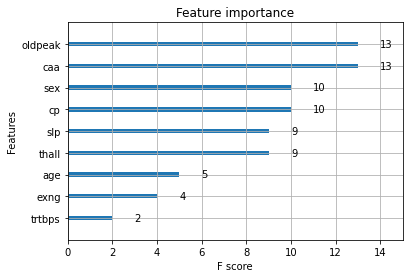

In [130]:
plot_importance(model_xgb)
plt.xlim(0,15)
plt.show()

Looks like oldpeak (ST depression induced by exercise relative to rest) &
caa (number of major vessels (0-3) colored by flourosopy) are the two most important features in predicting the likelihood of heart attack.
